In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '../data/hurr.atl.ace.data.txt'

In [112]:
column_names = [
    'Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
    'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [113]:
df_ace = pd.read_csv(file_path, delim_whitespace=True, header=None, names=column_names, skiprows=100)

In [114]:
df_ace = df_ace[:-8]

In [115]:
for column in column_names[1:]:
    df_ace[column] = pd.to_numeric(df_ace[column])

In [116]:
df_ace['Annual_Sum'] = df_ace.iloc[:, 1:].sum(axis=1)

In [ ]:
df_ace['Year'] = pd.to_datetime(df_ace['Year'], format='%Y')

In [ ]:
df_ace.set_index('Year', inplace=True)

In [117]:
df_ace

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual_Sum
0,1950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.2,93.8,52.3,2.0,0.0,211.3
1,1951,5.4,0.0,0.0,0.0,16.1,0.0,0.0,24.3,57.8,17.4,0.0,5.3,126.3
2,1952,0.0,1.3,0.0,0.0,0.0,0.0,0.0,10.3,32.4,21.6,3.5,0.0,69.1
3,1953,0.0,0.0,0.0,0.0,1.8,5.5,1.8,8.5,58.6,18.7,1.9,1.7,98.5
4,1954,0.0,0.0,0.0,0.0,1.2,7.4,4.0,13.7,29.8,45.9,0.7,1.7,104.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,2018,0.0,0.0,0.0,0.0,1.8,0.0,12.2,2.9,72.8,42.9,0.0,0.0,132.6
69,2019,0.0,0.0,0.0,0.0,0.4,0.0,3.5,16.4,93.4,12.6,5.9,0.0,132.2
70,2020,0.0,0.0,0.0,0.0,2.1,4.6,11.0,25.3,62.9,38.7,35.8,0.0,180.4
71,2021,0.0,0.0,0.0,0.0,0.8,2.5,9.9,31.2,74.8,21.9,4.4,0.0,145.5


In [122]:
# Add a horizontal line at a specific y-coordinate (e.g., mean value)
mean_value = df_ace['Annual_Sum'].mean()
median_value = df_ace['Annual_Sum'].median()

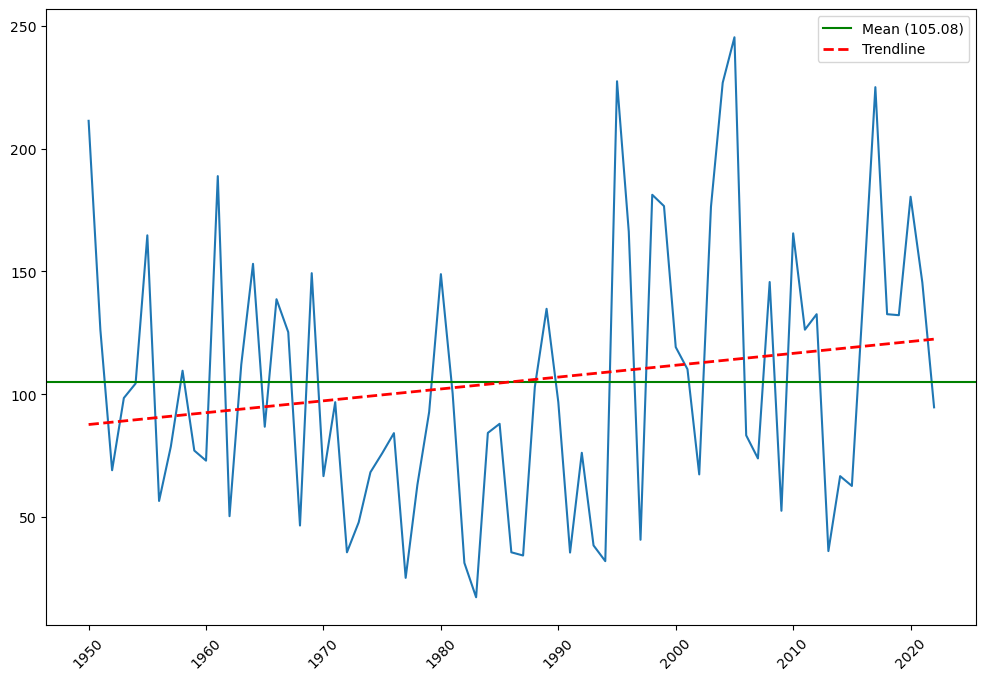

In [124]:
#fig, ax = plt.subplots()
plt.figure(figsize=(12,8))
#sns.lineplot(x=df_ace.index, y=df_ace['Annual_Sum'])
plt.plot(df_ace['Year'], df_ace['Annual_Sum'])
plt.xticks(ticks=np.arange(df_ace.index.min(), df_ace.index.max()+1, 10), rotation=45)
plt.axhline(y=mean_value, color='g', linestyle='-', label=f'Mean ({mean_value:.2f})')
#plt.axhline(y=median_value, color='g', linestyle='-', label=f'Mean ({median_value:.2f})')
# Calculate the trendline
z = np.polyfit(df_ace.index, df_ace['Annual_Sum'], 1)
p = np.poly1d(z)
plt.plot(df_ace.index, p(df_ace.index), "r--", label='Trendline', linewidth=2)
plt.legend()

In [120]:
df_ace.describe()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual_Sum
count,73.000000,73.000000,73.0,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,0.309589,0.017808,0.0,0.069863,0.605479,1.941096,4.567123,22.391781,50.975342,18.591781,4.778082,0.830137,105.078082
std,1.224650,0.152153,0.0,0.403693,2.031276,2.959487,9.052640,19.178408,34.421964,16.408922,7.073763,2.641269,55.522353
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.900000,0.000000,0.000000,0.000000,17.400000
25%,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,8.000000,21.800000,3.900000,0.000000,0.000000,66.700000
50%,0.000000,0.000000,0.0,0.000000,0.000000,0.800000,1.500000,16.400000,46.800000,15.700000,1.700000,0.000000,96.800000
75%,0.000000,0.000000,0.0,0.000000,0.000000,2.400000,5.100000,32.900000,72.800000,28.500000,7.600000,0.000000,142.600000
max,6.500000,1.300000,0.0,3.200000,16.100000,14.400000,60.400000,79.800000,174.100000,71.300000,35.800000,16.200000,245.300000
